In [905]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


## 1) Read CSV file

In [906]:
Heart_data =  pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
Heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## 2) Get a deeper understanding of our data.

### information about attributes

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3:       non-- -- anginal pain, Value 4: asymptomatic)
- **trestbps** : The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol**: The person's cholesterol measurement in mg/dl
- **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 - showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**: The person's maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca**: The number of major vessels (0-3)
- **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target**: Heart disease (0 = no, 1 = yes)

In [907]:
Heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [908]:
Heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### All columns dtype is int except oldpeak is float

In [909]:
Heart_data.shape

(303, 14)

In [910]:
# Does the dataset contain null values?
Heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Thankfully it does not contain any NaN values

## 3) Data Visualization

 ### Are there any correlations between the different attributes of the given dataset?

In [911]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Plotting the distribution of numerical variables

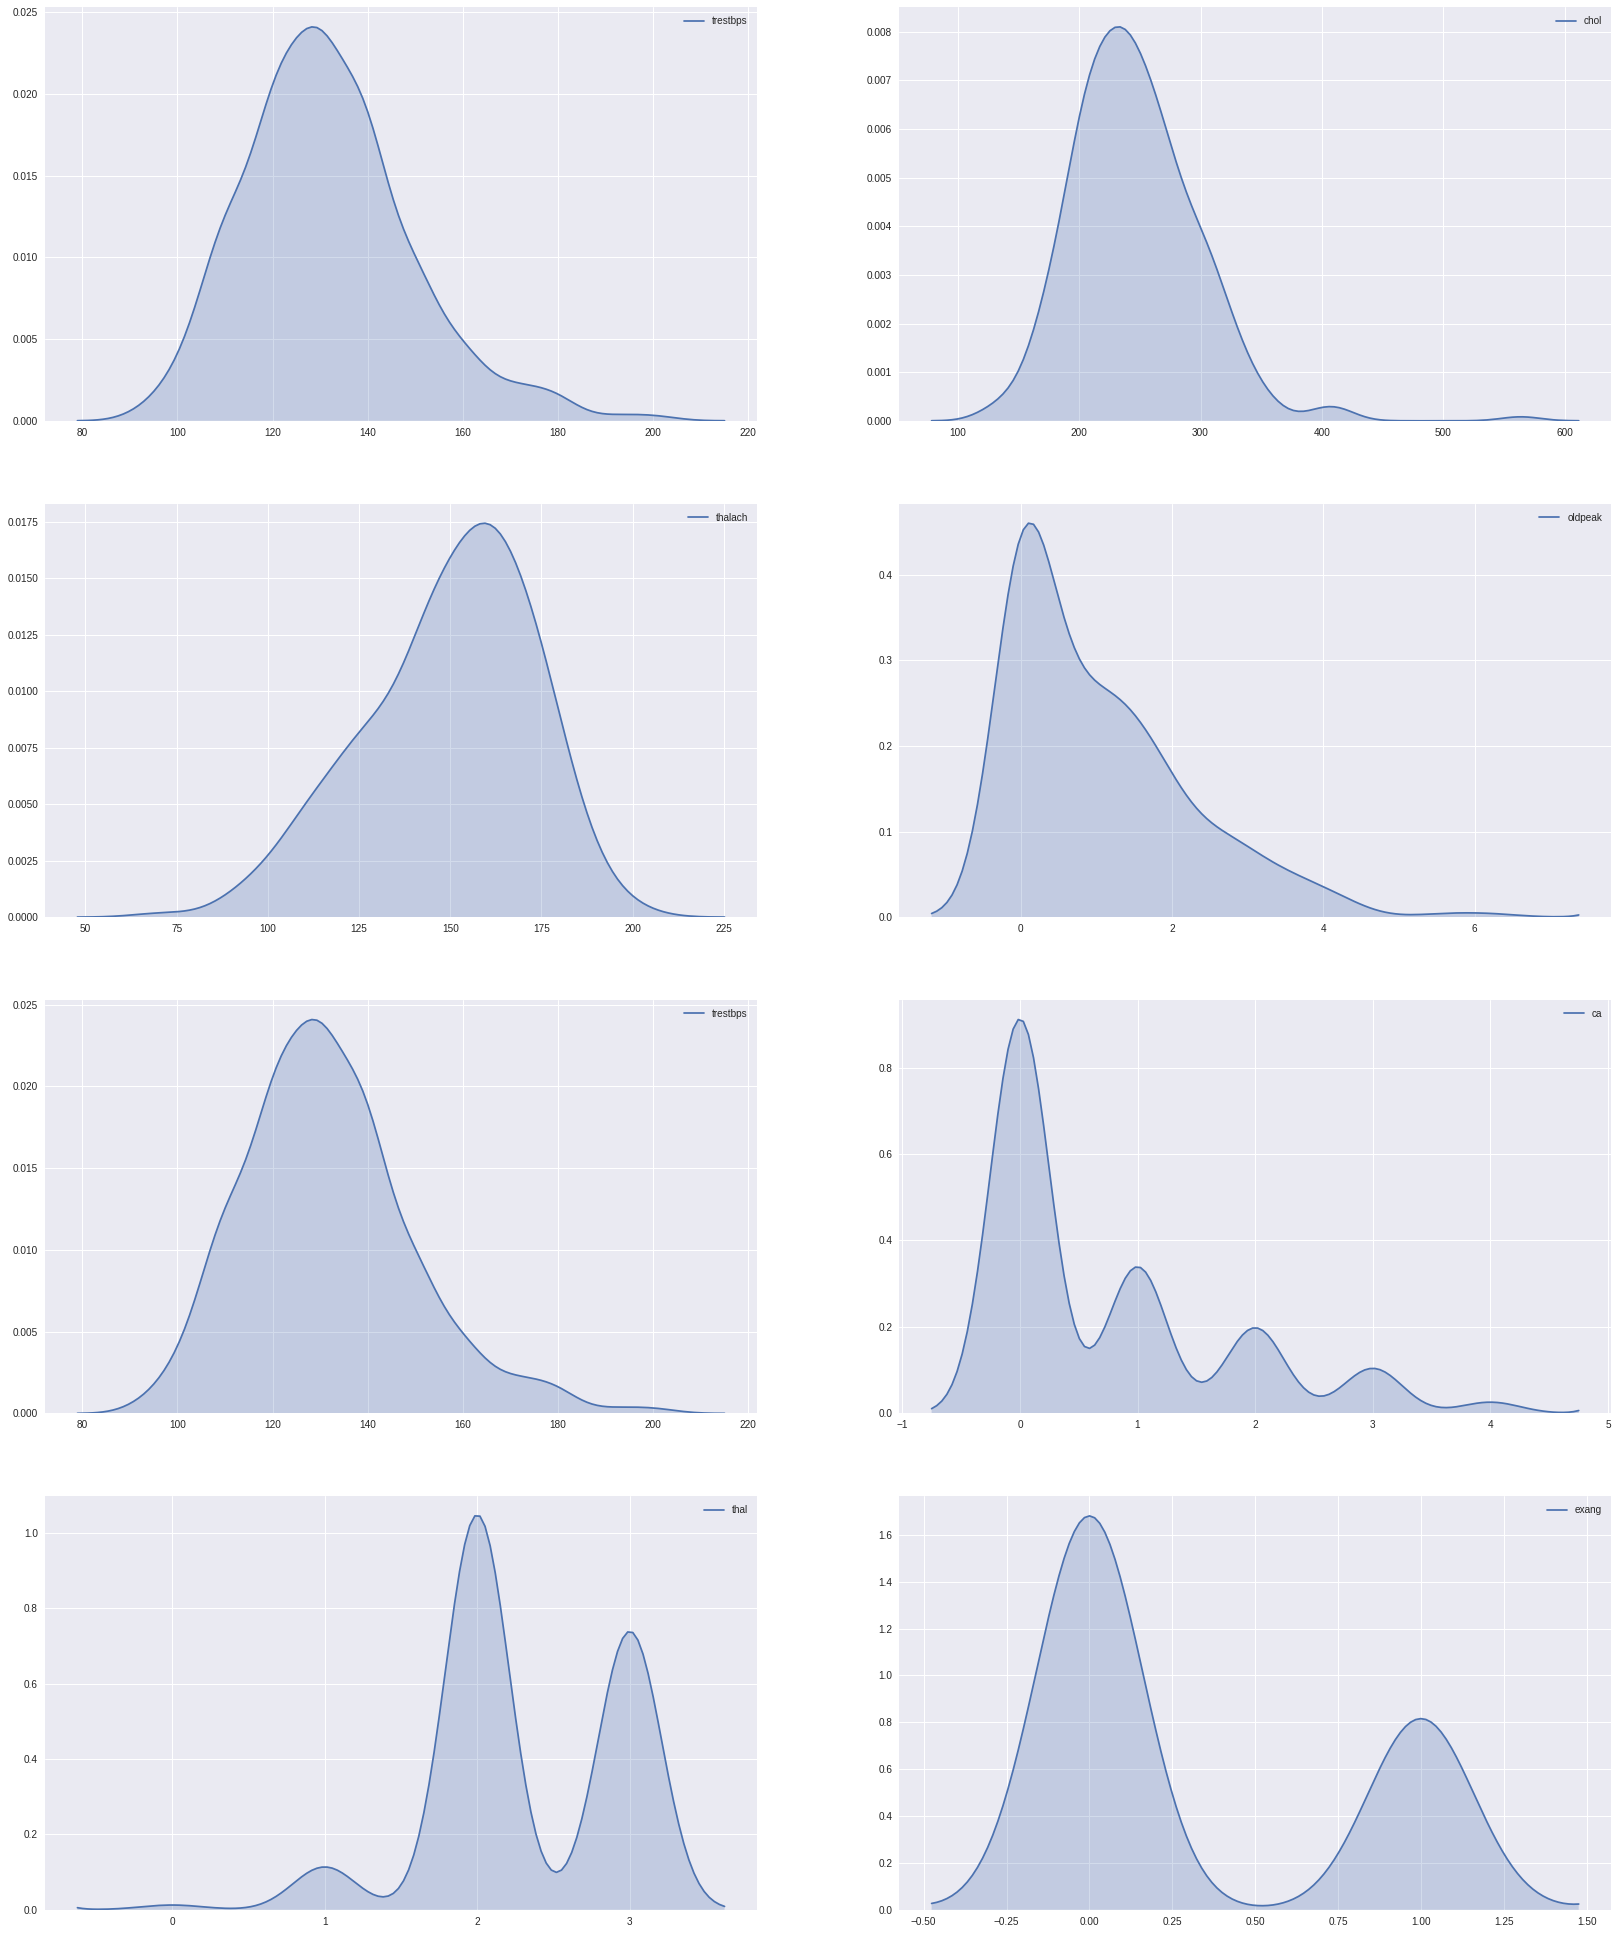

In [912]:
plt.figure(figsize=(25,35))
for i, col in enumerate(['trestbps', 'chol','thalach','oldpeak', 'trestbps', 'ca','thal', 'exang']):
    plt.subplot(4,2,i+1)
    sns.kdeplot(Heart_data[col],shade=True)
plt.show()

(**ca** , **exang** **thal**) they are bimodal distributed feature.

## Correlation Analysis

#### is used to test relationships between quantitative variables or categorical variables. In other words, it’s a measure of how things are related

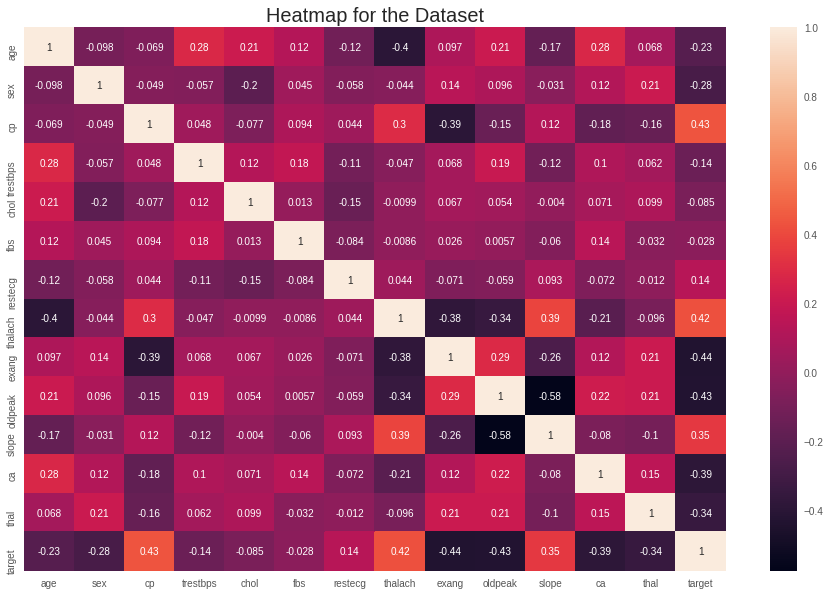

In [913]:
plt.style.use('ggplot')

plt.figure(figsize=(14, 10))

sns.heatmap(data=Heart_data.corr(), annot = True)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

****The above Heat Map shows that almost all of the features/attributes given in the dataset are very less correlated with each other. This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.****

## Recoding categorical variables with the labels for easy reading

In [914]:
new_values={"sex":{1:"Male",0:"Female"},
         "cp":{0:"typical angina",1: "non-anginal pain" ,2: "atypical angina" ,3: "asymptomatic"},
         "fbs":{0:"<=120",1:">120"},
         "exang":{0:"no",1:"yes"},
         "restecg" :{0:"normal" ,1:"ST-T wave abnormality",2:"probable or definite left ventricular hypertrophy"},
         "target" :{ 0:"No Heart Disease",1 : "heart-disease"},
         "thal" :{ 1 : "fixed defect",0 : "normal",2 : "reversable defect",3:"NA"}
         
}

Heart_data_copy = Heart_data.copy()
Heart_data_copy.replace(new_values,inplace=True)

### Is the dataset Balanced?

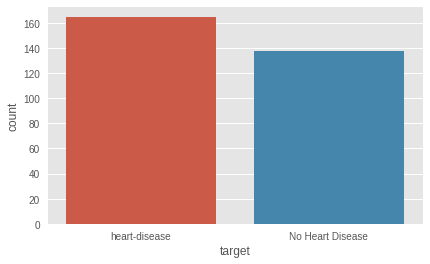

In [915]:

sns.countplot(Heart_data_copy['target'])

 **Yes, The dataset is quite balanced**

In [916]:
Heart_data_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,>120,normal,150,no,2.3,0,0,fixed defect,heart-disease
1,37,Male,atypical angina,130,250,<=120,ST-T wave abnormality,187,no,3.5,0,0,reversable defect,heart-disease
2,41,Female,non-anginal pain,130,204,<=120,normal,172,no,1.4,2,0,reversable defect,heart-disease
3,56,Male,non-anginal pain,120,236,<=120,ST-T wave abnormality,178,no,0.8,2,0,reversable defect,heart-disease
4,57,Female,typical angina,120,354,<=120,ST-T wave abnormality,163,yes,0.6,2,0,reversable defect,heart-disease


## Understanding each categorical variables with the target

### 1) *Are males or females has higher rate of heart disease?*

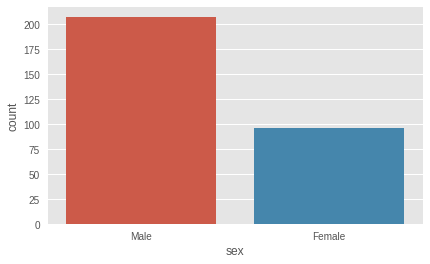

In [917]:
# Plot the count of each gender
sns.countplot(Heart_data_copy['sex'])

- About 100 rows are females 
- About 200 rows are males

### Sex vs Heart Disease

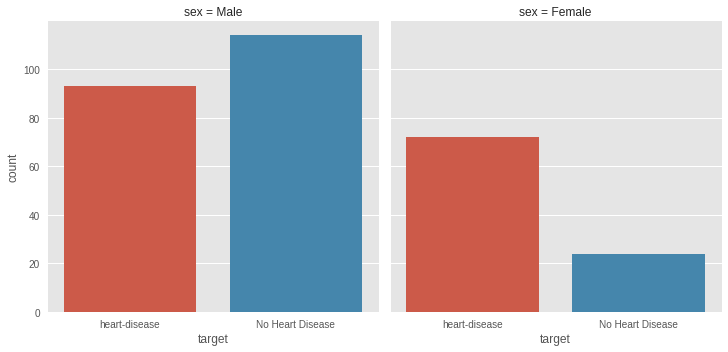

In [918]:
sns.catplot('target',col='sex',data=Heart_data_copy,kind='count')

- 110 males have heart disease, while 90 don't have, approx.
- 70 females have heart disease, while 30 don't have, approx.

In [978]:
# to make sure exactly then use  pd.crosstab() --> Compute a simple cross tabulation of two (or more) factors.
pd.crosstab(Heart_data_copy.target, Heart_data_copy.sex)

sex,Female,Male
target,,
No Heart Disease,24,114
heart-disease,72,93


#### Then females are highly suffering from heart disease as compared to males

### 2) Check at what age in each gender heart disease has occured the most?*

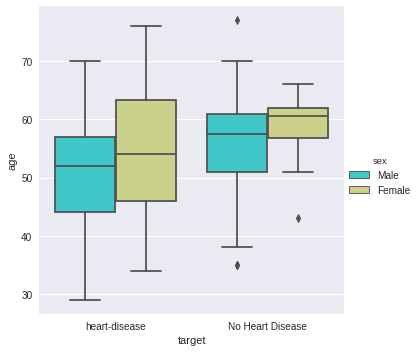

In [1022]:
sns.catplot(x="target", y="age", hue="sex",data=Heart_data_copy, palette='rainbow', kind='box') 

- Female age is between 35-77 approx, heart disease predicted to occur for females between age 45-65 approx.

- Male age is between 30-70 approx, heart disease predicted to occur for males is between 45-55 approx.


### 3) Which ages are more likely to have heart disease?

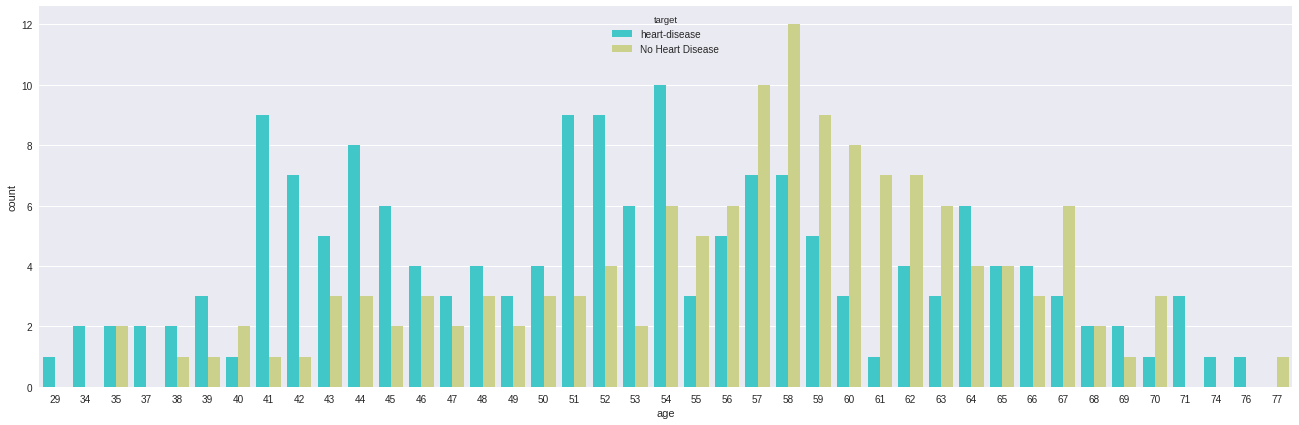

In [965]:
plt.figure(figsize=(20,7))
sns.countplot("age", hue="target",data=Heart_data_copy, palette='rainbow') 

From The Graph we can see  age is not a very good attribute to determine the heart disease of a patient as a patient of heart diseases range from 35-70 years. whereas it is not important that all of the people lying in that same age group are bound to suffer from the heart diseases.


## Chest Pain vs Heart Disease


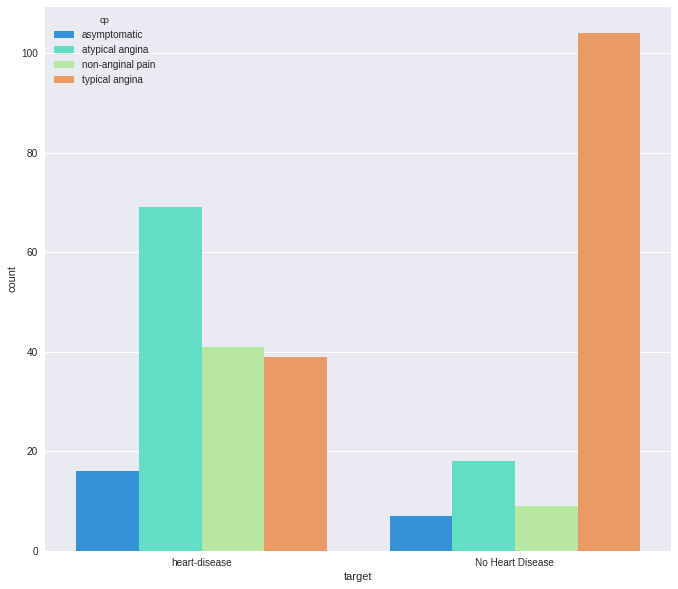

In [922]:
plt.figure(figsize=(10,10))

sns.countplot("target", hue='cp', data=Heart_data_copy, palette='rainbow')

 Most proportion of people suffering from heart disease shows pain type 2 **atypical anginal pain.**

## What is the relation between heart rate (thalach) and age ?

Text(0.5, 1.0, 'Heart Disease in function of Age and Max Heart Rate')

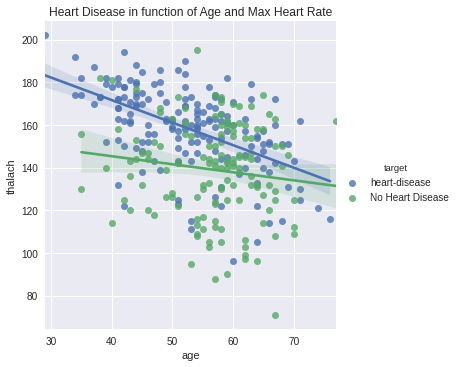

In [980]:
sns.lmplot(x='age',y='thalach', hue='target', data=Heart_data_copy)
plt.title("Heart Disease in function of Age and Max Heart Rate")


#### maximum heart rate (thalach) decreases with age. Older healthy people tend to have lower heart rate

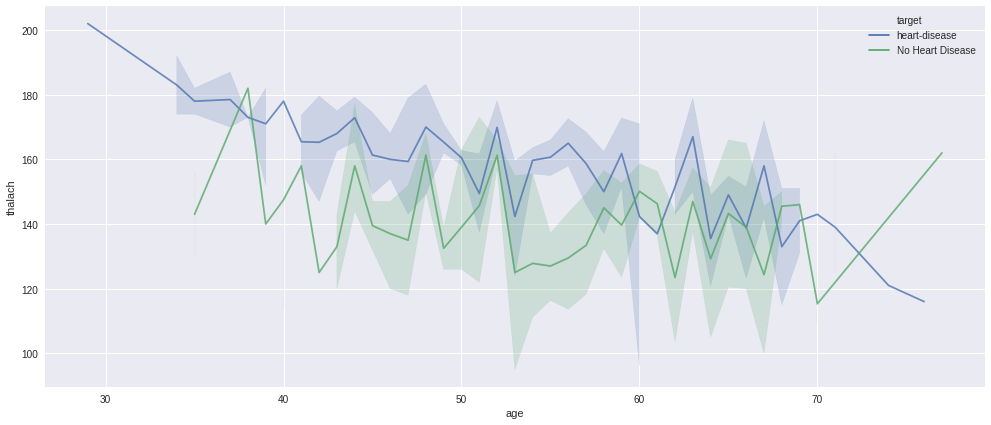

In [988]:
plt.figure(figsize=(15,7))

sns.lineplot(x='age',y='thalach', hue='target', data=Heart_data_copy)

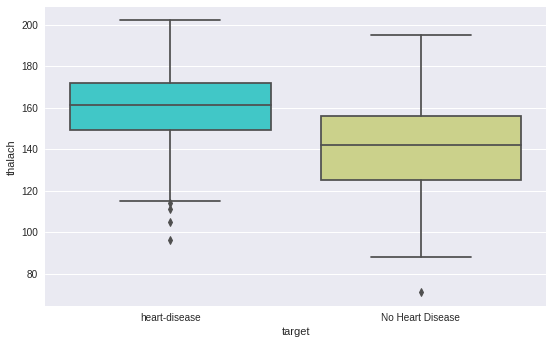

In [967]:
sns.boxplot(x='target',y='thalach', data=Heart_data_copy, palette='rainbow')

patients who are likely to suffer from heart diseases are having higher maximum heart rates whereas the patients who are not likely to suffer from any heart diseases are having lower maximum heart rates.

people's heart with a disease has to do more work as compared to people who do not have heart-disease.

### Resting Ecg vs Heart Disease

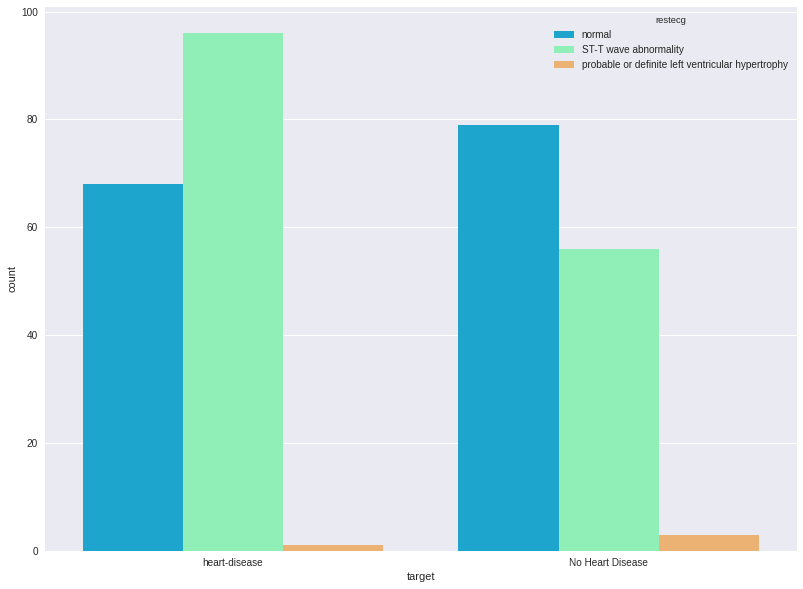

In [925]:
plt.figure(figsize=(12,10))

sns.countplot("target", hue='restecg' , data=Heart_data_copy, palette='rainbow')

The above plot shows that the patients having restscg value 2 are not likely to suffer from heart diseases, whereas patients have restecg value 1 "ST-T wave abnormality" are more likely to suffer from a heart disease than the patients having restscg value 0 "normal".

So, people showing an abnormality in ST-T wave generally have a heart condition and this could play a major role in early detection of heart disease.

### Thalium Test (Blood disorder called Thalessemia) Result vs Heart Disease

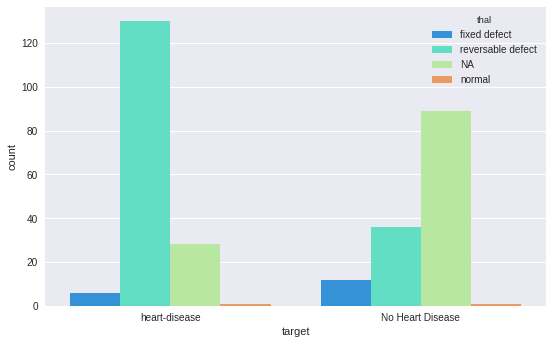

In [973]:
sns.countplot("target", hue='thal' , data=Heart_data_copy, palette='rainbow')

The above plot shows that the patients having no **Thalessemia** are less likely to suffer from heart diseases, whereas patients with reversable defects "value 2" during Thalium Test are more prone to heart disease, and thus it could prove to be a good predictor for heart disease.

## *trestbps*: Resting Blood Pressure vs Heart Disease

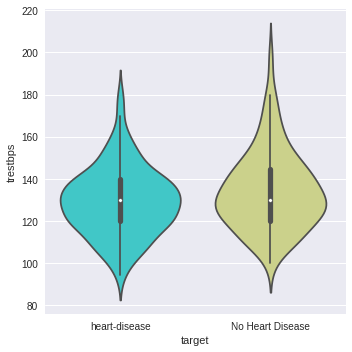

In [927]:
sns.catplot(x="target",y="trestbps",data=Heart_data_copy, palette='rainbow' ,kind='violin')
plt.show()

A very slight difference, people with no heart disease has slightly higher Resting Blood Pressure

###  Cholestrol levels vs heart disease  

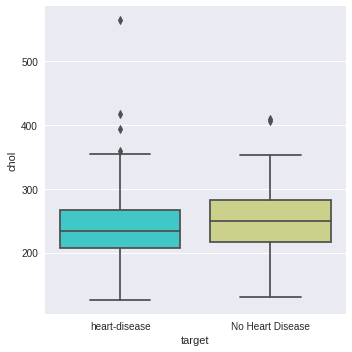

In [1015]:
sns.catplot(x="target",y="chol",data=Heart_data_copy, palette='rainbow' ,kind='box')

Patients who suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target no heart diseases.

## Fasting blood sugar vs Heart diseases

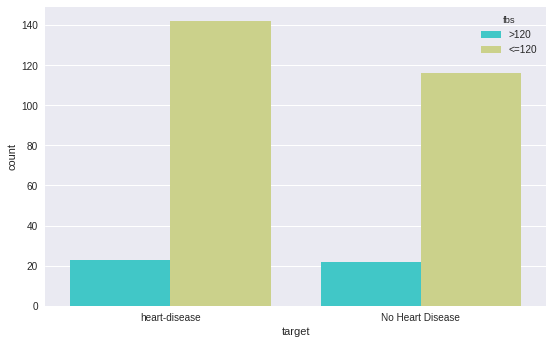

In [975]:
sns.countplot("target", hue='fbs' , data=Heart_data_copy, palette='rainbow')

If the person's fasting blood sugar is <= 120 then they are more likely of having heart problems.

### Exercise-induced angina vs Heart diseases

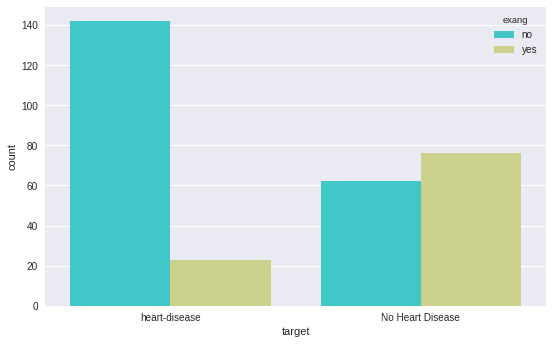

In [977]:
sns.countplot("target", hue='exang' , data=Heart_data_copy, palette='rainbow')

This relation is ambiguous!! people with Exercise-induced angina are not porne to heart disease compared with with people having no  Exercise-induced angina ???

## ST depression induced by exercise relative to rest  vs Heart problems

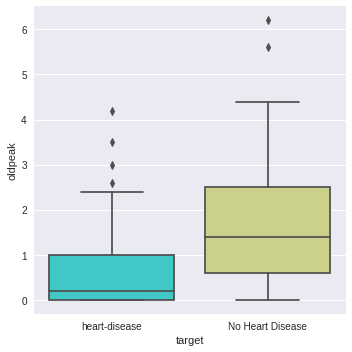

In [1026]:
sns.catplot(x="target",y="oldpeak",data=Heart_data_copy, palette='rainbow', kind="box")

## Data pre-proccessing

- Use MinMaxScaler as the default if you are transforming a feature. It’s non-distorting.
- Use RobustScaler if you have outliers and want to reduce their influence. However, you might be better off removing the outliers, instead.
- Use StandardScaler if you need a relatively normal distribution.

Text(0.5, 1.0, 'MinMaxScaled data')

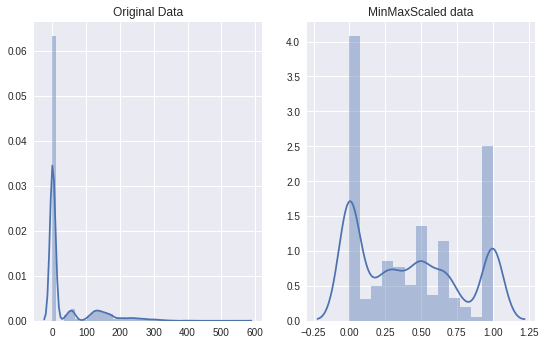

In [931]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


# define min max scaler
scaler = MinMaxScaler()
# transform data
MinMaxScaled = scaler.fit_transform(Heart_data)

# plot both data together to compare

fig, ax = plt.subplots(1,2)
sns.distplot(Heart_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(MinMaxScaled, ax=ax[1])
ax[1].set_title("MinMaxScaled data")

In [932]:
MinMaxScaled

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.33333333,
        1.        ],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.66666667,
        1.        ],
       [0.25      , 0.        , 0.33333333, ..., 0.        , 0.66666667,
        1.        ],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.58333333, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.25      , 0.66666667,
        0.        ]])

Text(0.5, 1.0, 'RobustScaled data')

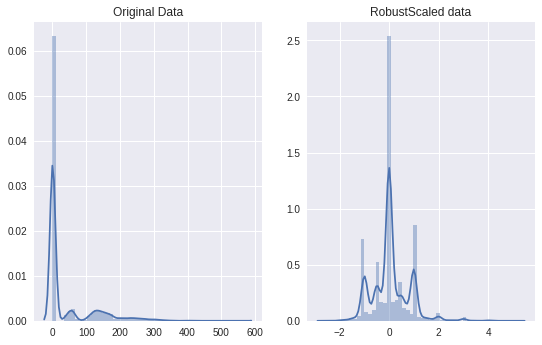

In [933]:
# define RobustScaler scaler
scaler = RobustScaler()
# transform data
RobustScaled = scaler.fit_transform(Heart_data)

# plot both data together to compare

fig, ax = plt.subplots(1,2)
sns.distplot(Heart_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(RobustScaled, ax=ax[1])
ax[1].set_title("RobustScaled data")

In [934]:
RobustScaled

array([[ 0.59259259,  0.        ,  1.        , ...,  0.        ,
        -1.        ,  0.        ],
       [-1.33333333,  0.        ,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [-1.03703704, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.96296296,  0.        , -0.5       , ...,  2.        ,
         1.        , -1.        ],
       [ 0.14814815,  0.        , -0.5       , ...,  1.        ,
         1.        , -1.        ],
       [ 0.14814815, -1.        ,  0.        , ...,  1.        ,
         0.        , -1.        ]])

Text(0.5, 1.0, 'StandardScaled data')

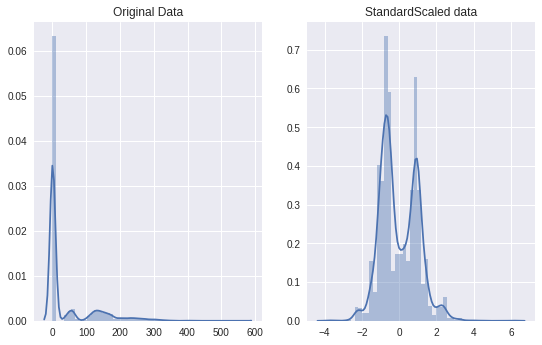

In [935]:
# define StandardScaler scaler
scaler = StandardScaler()
# transform data
StandardScaled = scaler.fit_transform(Heart_data)

# plot both data together to compare

fig, ax = plt.subplots(1,2)
sns.distplot(Heart_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(StandardScaled, ax=ax[1])
ax[1].set_title("StandardScaled data")

In [936]:
StandardScaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

## Feature selection

In [937]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

X = Heart_data.drop('target',axis=1)
y = Heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Keep 5 features
selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(X_train, y_train)
X_new

array([[0.00e+00, 1.38e+02, 1.00e+00, 1.90e+00, 1.00e+00],
       [0.00e+00, 9.90e+01, 1.00e+00, 1.80e+00, 2.00e+00],
       [0.00e+00, 1.48e+02, 1.00e+00, 3.00e+00, 0.00e+00],
       ...,
       [3.00e+00, 1.31e+02, 0.00e+00, 1.00e-01, 1.00e+00],
       [0.00e+00, 1.44e+02, 0.00e+00, 8.00e-01, 0.00e+00],
       [1.00e+00, 1.79e+02, 0.00e+00, 0.00e+00, 2.00e+00]])

In [938]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 columns=Heart_data.columns.drop('target'))

# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0.0]

# Get the valid dataset with the selected features.
X_test[selected_columns].head()

,cp,thalach,exang,oldpeak,ca
179,0,112,1,0.6,1
228,3,159,0,0.2,0
111,2,173,0,0.2,1
246,0,150,1,1.9,2
60,2,130,0,0.0,1


In [939]:
# Keep 7 features
selector = SelectKBest(f_classif, k=9)

X_new = selector.fit_transform(X_train, y_train)
X_new

array([[61.,  1.,  0., ...,  2.,  1.,  3.],
       [62.,  1.,  0., ...,  1.,  2.,  3.],
       [45.,  1.,  0., ...,  1.,  0.,  2.],
       ...,
       [69.,  1.,  3., ...,  1.,  1.,  2.],
       [46.,  1.,  0., ...,  2.,  0.,  3.],
       [63.,  0.,  1., ...,  2.,  2.,  2.]])

In [940]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 columns=Heart_data.columns.drop('target'))
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0.0]

# Get the valid dataset with the selected features.
X_test[selected_columns].head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,112,1,0.6,1,1,1
228,59,1,3,159,0,0.2,1,0,3
111,57,1,2,173,0,0.2,2,1,3
246,56,0,0,150,1,1.9,1,2,3
60,71,0,2,130,0,0.0,2,1,2


# L1 regularization

In [941]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

X = Heart_data.drop('target',axis=1)
y = Heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Set the regularization parameter C=0.1
logistic = LogisticRegression(C=0.1, penalty="l1", solver='liblinear', random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
X_new

array([[  1. ,   3. , 145. , ...,   2.3,   0. ,   1. ],
       [  1. ,   2. , 130. , ...,   3.5,   0. ,   2. ],
       [  0. ,   1. , 130. , ...,   1.4,   0. ,   2. ],
       ...,
       [  1. ,   0. , 144. , ...,   3.4,   2. ,   3. ],
       [  1. ,   0. , 130. , ...,   1.2,   1. ,   3. ],
       [  0. ,   1. , 130. , ...,   0. ,   1. ,   2. ]])

In [942]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 columns=Heart_data.columns.drop('target'))

# Dropped columns have values of all 0s, keep other columns 
selected_columns = selected_features.columns[selected_features.var() != 0]
X_test[selected_columns].head()

,sex,cp,trestbps,chol,thalach,oldpeak,ca,thal
179,1,0,150,276,112,0.6,1,1
228,1,3,170,288,159,0.2,0,3
111,1,2,150,126,173,0.2,1,3
246,0,0,134,409,150,1.9,2,3
60,0,2,110,265,130,0.0,1,2


In [943]:
# Set the regularization parameter C= 0.5
logistic = LogisticRegression(C=0.5, penalty="l1", solver='liblinear', random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)

selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 columns=Heart_data.columns.drop('target'))

selected_columns = selected_features.columns[selected_features.var() != 0]
X_test[selected_columns].head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,150,1,1.9,1,2,3
60,71,0,2,110,265,0,130,0,0.0,2,1,2


In [944]:
# Set the regularization parameter C=0.1 and L2
logistic = LogisticRegression(C=0.1, penalty="l2", solver='liblinear', random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)

selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 columns=Heart_data.columns.drop('target'))

selected_columns = selected_features.columns[selected_features.var() != 0]
X_test[selected_columns].head()

,sex,cp,exang,oldpeak,ca,thal
179,1,0,1,0.6,1,1
228,1,3,0,0.2,0,3
111,1,2,0,0.2,1,3
246,0,0,1,1.9,2,3
60,0,2,0,0.0,1,2


In [945]:
# Set the regularization parameter C=1 and L2
logistic = LogisticRegression(C=1, penalty="l2", solver='liblinear', random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)

selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 columns=Heart_data.columns.drop('target'))

selected_columns = selected_features.columns[selected_features.var() != 0]
X_test[selected_columns].head()

,sex,cp,exang,oldpeak,slope,ca,thal
179,1,0,1,0.6,1,1,1
228,1,3,0,0.2,1,0,3
111,1,2,0,0.2,2,1,3
246,0,0,1,1.9,1,2,3
60,0,2,0,0.0,2,1,2
